# Detección de esquinas de Harris

## Teoría

Calcularemos las esquinas utilizando el algoritmo de detección de esquinas de Harris.
<br><br>
Una esquina es una región de la imagen con una gran variación en intensidad en todas direcciones.
<br><br>
Encontraremos la variación en la intensidad para un desplazamiento $(u,v)$ en cada dirección $x,y$

$$
    E(u,v)=\sum_{x,y}{w(x,y)\big[I(x+u,y+v)-I(x,y)\big]^2}
$$


La ventana puede ser cuadrada o gaussiana.
<br><br>
Se quiere maximizar $E(u,v)$. Por lo que se iencontrará el gradiante por medio de una aproximación por serie de Taylor.<br>
El resultado final será:<br>
$$
   E(u,v)\approx
   \begin{bmatrix}u&v\end{bmatrix}
   M \begin{bmatrix}u\\v\end{bmatrix}
$$

<br>Donde<br>
$$
   M = \sum_{x,y}{
     w(x,y) 
     \begin{bmatrix}
       I_x I_x &I_x I_y\\I_x I_y &I_y I_y
     \end{bmatrix}
   }
$$

$I_x$ y $I_y$ son derivada en dirección $x$ y $y$, respectivamente.
<br>
Con esta derivada. Se determinará si una ventana tiene o no una esquina.

$$
R=det(M)-k(traza(M))^2
$$

<br>
<br>
Donde:
<ul>
<li>$det(M)=\lambda_1\lambda_2 $
<li>$ traza(M)=\lambda_1+\lambda_2 $
<li>$ \lambda_1$ y $\lambda_2$ son los eigen-valores de $M$<br><br>



Para decidir si una región es esquina o no:
<br>
<ul>
<li>Si $|R|$ es pequeño (cuando $\lambda_1$ y $\lambda_2$ son pequeños, la región es plana.<br>
<li>Si $R<0$, cuando $\lambda_1 >> \lambda_2$ o al revés, la región es un borde.
<li> Si $R$ es grande, cuando $\lambda_1$ y $\lambda_2$ son grandes y $\lambda_1 \approx \lambda_2$ la región es una esquina.

<br><br>
El resultado de la detección es una imagen en tonos de gris, donde a cada punto se le asigna su R.



## Ejemplo

La función de OpenCV cornerHarris() recibe como argumentos:

<ul>
<li> _img_: La imagen de entrada. Debe ser en tonos de gris
<li> _blockSize_: Tamaño del vecindario considerado para la detección.
<li> _ksize_: Tamaño del vecindario considerado para la derivada.
<li> _k_: Parámetro k para el cálculo de R. Puede ser aumentado o disminuído para ajustarlo a la imagen (empíricamente entre 0.04 y 0.06 es buen tamaño)

Importamos las librerías adecuadas:

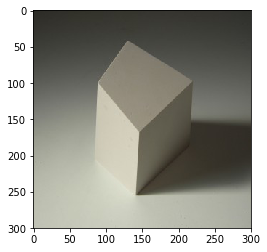

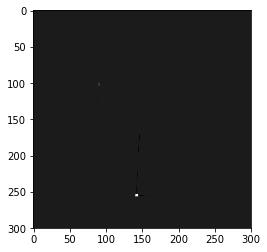

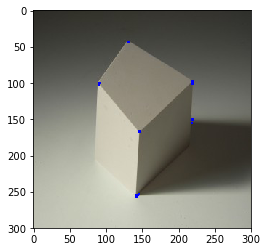

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = 'prism.jpg' ##cambiar a chess01.png chess.jpg y prism.jpg
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.05)

#se dilata el resultado, sólo para mostrar las orillas
dst = cv2.dilate(dst,None)
dst2 = dst[dst>0.0005*dst.max()]
# Umbral para mostrar las orillas, puede ser cambiado.
img2=np.copy(img)
img2[dst>0.0005*dst.max()]=[0,0,255]


plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(dst, cmap='gray')
plt.show()

plt.imshow(img2, cmap='gray')
plt.show()


## Esquinas más precisas
### Mejora a Harris Corner Detection


![imagen](./subpixel3.png)


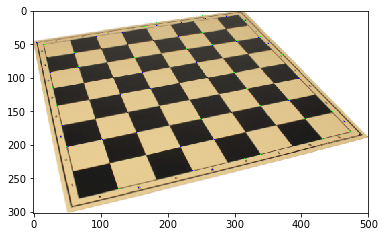

In [57]:
filename = 'chess.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Encontrar esquinas de Harry

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# Encontrar centroides
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# Definir criterio de recursión para mejorar esquinas

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Dibujarlas
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('subpixel5.png',img)
plt.imshow(img, cmap='gray')
plt.show()

## Ejercicio:

Calcular las esquinas y para cada esquina ubicada, 
representarla descriptivamente como objetos json siguiendo el siguiente formulario:
    
{<br>
    "description": "corner",<br>
    "type": "object",<br>
    "properties": {<br>
        "x": { "type": "number" },<br>
        "y": { "type": "number" }<br>
    }
}

Para las imágenes up01.jpg, up02.png, up03.png